<a href="https://colab.research.google.com/github/sjamillah/Chronic_Disease_Management_System/blob/main/Summative_Intro_to_ml_%5BSSOZI_Jamillah%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo



In [82]:
!pip install tensorflow


# Case Study and Implementation




In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [85]:
data = pd.read_csv('/content/cardio_train.csv', delimiter=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [86]:
relevant_features = ['age', 'height', 'weight', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
data_filtered = data[relevant_features + ['cardio']]
data_filtered.head()

,age,height,weight,gender,ap_hi,ap_lo,cholesterol,gluc,cardio
0,18393,168,62.0,2,110,80,1,1,0
1,20228,156,85.0,1,140,90,3,1,1
2,18857,165,64.0,1,130,70,3,1,1
3,17623,169,82.0,2,150,100,1,1,1
4,17474,156,56.0,1,100,60,1,1,0


In [87]:
np.random.seed(42)

cultural_belief_categories = ['Never', 'Occasionally', 'Frequently']
data_filtered.loc[:, 'cultural_belief_score'] = np.random.choice(cultural_belief_categories, len(data_filtered))

treatment_adherence = ['Low', 'Medium', 'High']
data_filtered.loc[:, 'treatment_adherence'] = np.random.choice(treatment_adherence, len(data_filtered))

distance_categories = ['Near', 'Moderate', 'Far']
data_filtered.loc[:, 'distance_to_healthcare'] = np.random.choice(distance_categories, len(data_filtered))

<ipython-input-87-89697823e833>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.loc[:, 'cultural_belief_score'] = np.random.choice(cultural_belief_categories, len(data_filtered))
<ipython-input-87-89697823e833>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.loc[:, 'treatment_adherence'] = np.random.choice(treatment_adherence, len(data_filtered))
<ipython-input-87-89697823e833>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [88]:
data_filtered.describe()

,age,height,weight,gender,ap_hi,ap_lo,cholesterol,gluc,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,1.349571,128.817286,96.630414,1.366871,1.226457,0.499700
std,2467.251667,8.210126,14.395757,0.476838,154.011419,188.472530,0.680250,0.572270,0.500003
min,10798.000000,55.000000,10.000000,1.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000
25%,17664.000000,159.000000,65.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000
50%,19703.000000,165.000000,72.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000
75%,21327.000000,170.000000,82.000000,2.000000,140.000000,90.000000,2.000000,1.000000,1.000000
max,23713.000000,250.000000,200.000000,2.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000


In [89]:
synthetic_notes = [
    "Patient shows high BP, high cholesterol, obesity-related risks. Echocardiogram suggests early-stage RHD.",
    "Mild hypertension noted. Controlled glucose levels. Moderate adherence to medication.",
    "History of tobacco use. Symptoms indicate potential COPD overlap. Needs lifestyle intervention.",
    "Shortness of breath and fatigue reported. Distance to care facility may impact treatment adherence."
]
data_filtered['clinical_notes'] = np.random.choice(synthetic_notes, len(data_filtered))

In [90]:
data_filtered.loc[:, 'risk_level'] = np.select(
    [
        (data_filtered['ap_hi'] <= 140) & (data_filtered['cholesterol'] <= 1) & (data_filtered['gluc'] <= 1),
        ((data_filtered['ap_hi'] > 140) & (data_filtered['ap_hi'] <= 160)) | (data_filtered['cholesterol'] == 2) | (data_filtered['gluc'] == 2),
        (data_filtered['ap_hi'] > 160) | (data_filtered['cholesterol'] > 2) | (data_filtered['gluc'] > 2)
    ],
    [0, 1, 2],
    default=1
)

In [91]:
data_filtered.drop('cardio', axis=1, inplace=True)

In [92]:
relevant_features = [
    'age', 'height', 'weight', 'gender', 'ap_hi', 'ap_lo',
    'cholesterol', 'gluc', 'cultural_belief_score',
    'treatment_adherence', 'distance_to_healthcare'
]
data_filtered = data_filtered[relevant_features + ['risk_level']]
data_filtered.head()

,age,height,weight,gender,ap_hi,ap_lo,cholesterol,gluc,cultural_belief_score,treatment_adherence,distance_to_healthcare,risk_level
0,18393,168,62.0,2,110,80,1,1,Frequently,Low,Moderate,0
1,20228,156,85.0,1,140,90,3,1,Never,Medium,Far,2
2,18857,165,64.0,1,130,70,3,1,Frequently,High,Near,2
3,17623,169,82.0,2,150,100,1,1,Frequently,High,Moderate,1
4,17474,156,56.0,1,100,60,1,1,Never,Low,Far,0


In [93]:
data_processed = pd.get_dummies(data_filtered, drop_first=True)

In [94]:
X = data_processed.drop('risk_level', axis=1)
Y = data_processed['risk_level']

In [95]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape

((49000, 14), (16800, 14), (4200, 14), (49000,), (16800,), (4200,))

In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [97]:
num_classes = len(set(Y_train))
print("Number of classes:", num_classes)

Number of classes: 3


In [98]:
print("NaN in X_train:", np.isnan(data_processed).sum().sum())
print("Inf in X_train:", np.isinf(data_processed).sum().sum())

NaN in X_train: 0
Inf in X_train: 0


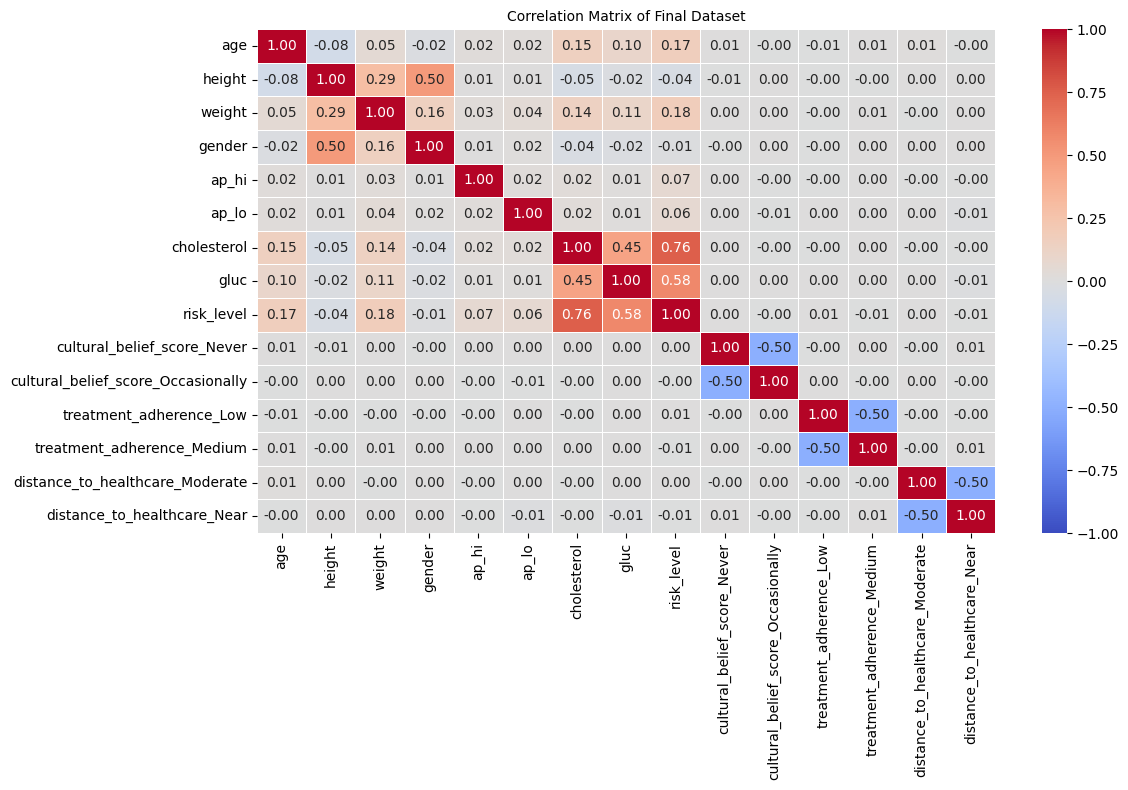

In [99]:
correlation_matrix = data_processed.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Final Dataset', fontsize=10)
plt.tight_layout()
plt.show()

#SECTION 1: Model Architecture:





In [7]:
from google.colab import files
uploaded = files.upload()

Saving cardiostructure.png to cardiostructure (1).png


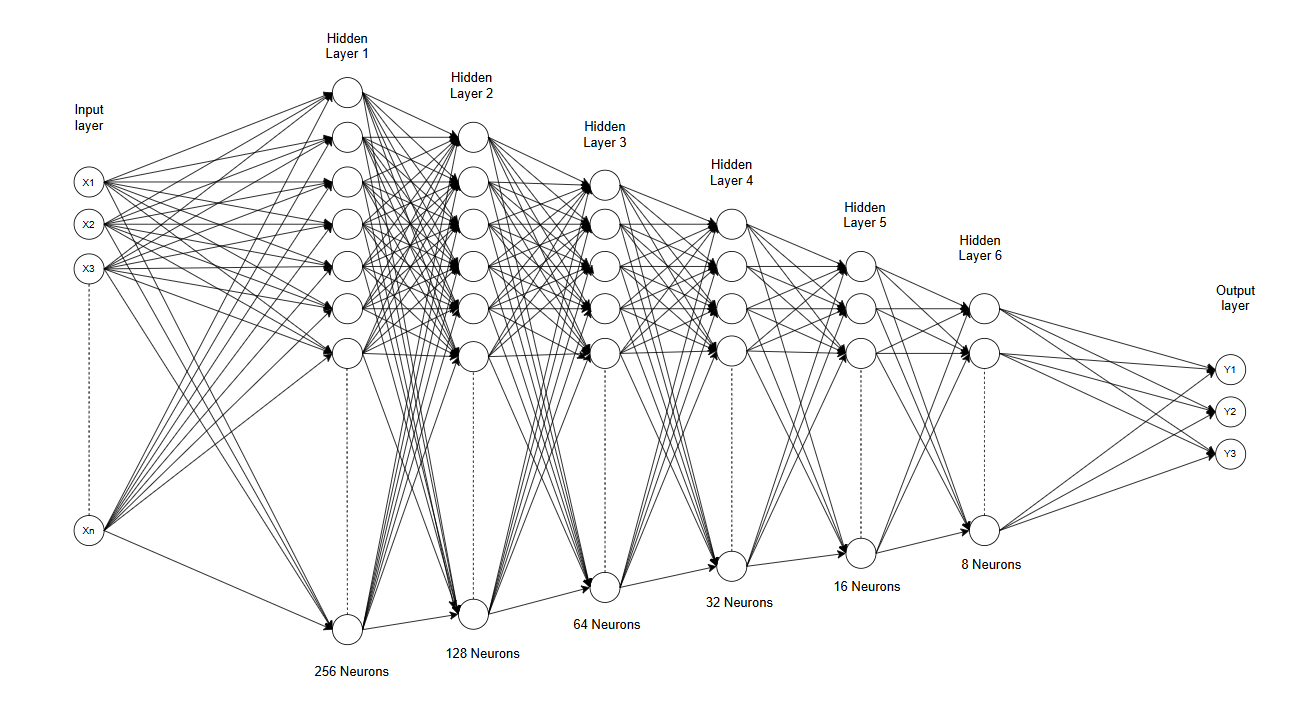

In [8]:
from IPython.display import Image, display
display(Image(filename='cardiostructure.png'))

#Task: Define a function that creates models without and With specified Optimization techniques


In [100]:
def cardio_model(
    model_type: str,
    X_train,
    Y_train,
    X_val,
    Y_val,
    optimization: str = "adam",
    regularization_type: str = None,
    reg_value: int = 0.1,
    early_stopping: bool = False,
    patience: int = 5,
    dropout: float = 0.0,
    epochs: int = 10,
    batch_size: int = 32,
    learning_rate: float = 0.002):

  model = Sequential()

  if regularization_type == "l1":
    regularizer = l1(reg_value)
  elif regularization_type == "l2":
    regularizer = l2(reg_value)
  else:
    regularizer = None

  if model_type == "model1":
    model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1], )))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

  else:
    model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1], ), kernel_regularizer=regularizer))
    model.add(BatchNormalization())
    if dropout > 0:
      model.add(Dropout(dropout))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizer))
    model.add(BatchNormalization())
    if dropout > 0:
      model.add(Dropout(dropout))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizer))
    model.add(BatchNormalization())
    if dropout > 0:
      model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizer))
    model.add(BatchNormalization())
    if dropout > 0:
      model.add(Dropout(dropout))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizer))
    model.add(Dense(8, activation='relu', kernel_regularizer=regularizer))
    model.add(Dense(num_classes, activation='softmax'))

  optimizers = {
      "adam": Adam(learning_rate=learning_rate),
      "sgd": SGD(learning_rate=learning_rate),
      "rmsprop": RMSprop(learning_rate=learning_rate)
  }

  optimizer = optimizers.get(optimization, Adam(learning_rate=learning_rate))

  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  callbacks = []
  if early_stopping:
    early_stopping_callback = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1)
    callbacks.append(early_stopping_callback)

  history = model.fit(
      X_train, Y_train,
      epochs=epochs,
      batch_size=batch_size,
      validation_data=(X_val, Y_val),
      callbacks=callbacks)

  return model, history

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [101]:
def loss_curve_plot(history, model_name="Model"):
    """Plots training and validation loss for a given model history."""

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))
    plt.plot(loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='red')
    plt.title(f'{model_name} - Training and Validation Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True, which='both', axis='both', linestyle='--', color='gray', alpha=0.5)
    plt.tight_layout()
    plt.show()


# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [149]:
# Model 1
model1, history_model1 = cardio_model(
    model_type="model1",
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    optimization="adam",
    early_stopping=False,
    regularization_type=None,
    reg_value=0.0,
    dropout=0.0,
    epochs=20,
    batch_size=32,
    learning_rate=0.0)

train_loss_model1, val_loss_model1 = history_model1.history['loss'][-1], history_model1.history['val_loss'][-1]
train_acc_model1, val_acc_model1 = history_model1.history['accuracy'][-1], history_model1.history['val_accuracy'][-1]

print(f"Model 1 - Train Loss: {train_loss_model1:.4f}, Validation Loss: {val_loss_model1:.4f}")
print(f"Model 1 - Train Accuracy: {train_acc_model1:.4f}, Validation Accuracy: {val_acc_model1:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1532/1532 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2418 - loss: 1.1244 - val_accuracy: 0.2414 - val_loss: 1.1243
Epoch 2/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2450 - loss: 1.1235 - val_accuracy: 0.2414 - val_loss: 1.1243
Epoch 3/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2453 - loss: 1.1236 - val_accuracy: 0.2414 - val_loss: 1.1243
Epoch 4/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2439 - loss: 1.1237 - val_accuracy: 0.2414 - val_loss: 1.1243
Epoch 5/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2412 - loss: 1.1247 - val_accuracy: 0.2414 - val_loss: 1.1243
Epoch 6/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2428 - loss: 1.1238 - val_accuracy: 0.2414 - val_loss: 1.1243
Epoch 7/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2423 - loss: 1.1242 - val_accuracy: 0.2414 - val_loss: 1.1243
Epoch 8/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2409 - loss: 1.1244 - val_accur

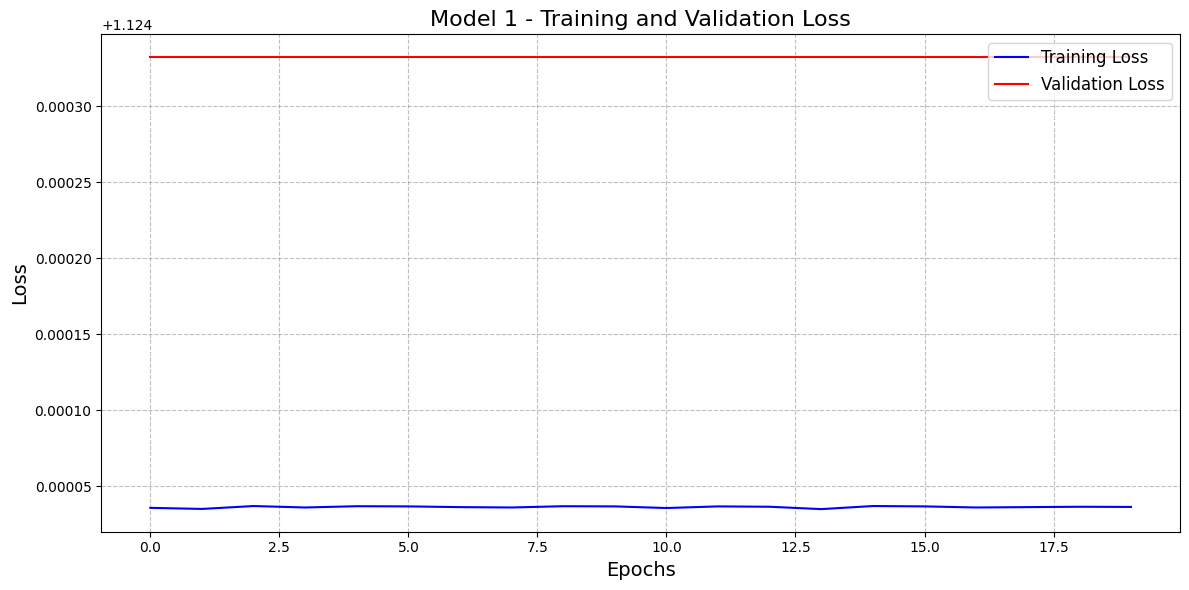

In [150]:
loss_curve_plot(history_model1, model_name="Model 1")

In [151]:
model1.save('model1.keras')

In [152]:
# Model 2
model2, history_model2 = cardio_model(
    model_type="model2",
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    optimization="adam",
    early_stopping=True,
    patience=20,
    regularization_type='l2',
    reg_value=0.2,
    dropout=0.5,
    epochs=150,
    batch_size=32,
    learning_rate=0.001)

train_loss_model2, val_loss_model2 = history_model2.history['loss'][-1], history_model2.history['val_loss'][-1]
train_acc_model2, val_acc_model2 = history_model2.history['accuracy'][-1], history_model2.history['val_accuracy'][-1]

print(f"Model 2 - Train Loss: {train_loss_model2:.4f}, Validation Loss: {val_loss_model2:.4f}")
print(f"Model 2 - Train Accuracy: {train_acc_model2:.4f}, Validation Accuracy: {val_acc_model2:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6498 - loss: 12.0763 - val_accuracy: 0.8452 - val_loss: 0.4975
Epoch 2/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8237 - loss: 0.5508 - val_accuracy: 0.8616 - val_loss: 0.4603
Epoch 3/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8279 - loss: 0.5176 - val_accuracy: 0.8823 - val_loss: 0.4180
Epoch 4/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8431 - loss: 0.4893 - val_accuracy: 0.8658 - val_loss: 0.4175
Epoch 5/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8504 - loss: 0.4847 - val_accuracy: 0.9000 - val_loss: 0.4169
Epoch 6/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8488 - loss: 0.4800 - val_accuracy: 0.9270 - val_loss: 0.3676
Epoch 7/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8533 - loss: 0.4766 - val_accuracy: 0.8533 - val_loss: 0.4343
Epoch 8/150
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8551 - loss

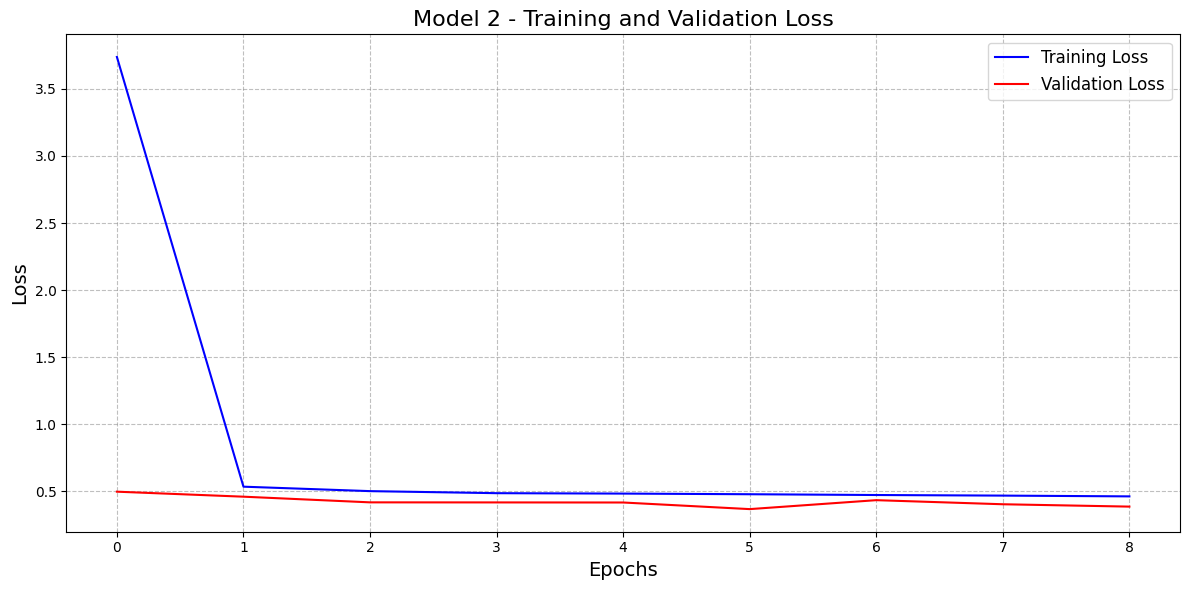

In [153]:
loss_curve_plot(history_model2, model_name="Model 2")

In [154]:
model2.save('model2.keras')

In [162]:
# Model 3
model3, history_model3 = cardio_model(
    model_type="model3",
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    optimization="sgd",
    early_stopping=True,
    patience=20,
    regularization_type='l2',
    reg_value=0.1,
    dropout=0.4,
    epochs=500,
    batch_size=32,
    learning_rate=0.006)

train_loss_model3, val_loss_model3 = history_model3.history['loss'][-1], history_model3.history['val_loss'][-1]
train_acc_model3, val_acc_model3 = history_model3.history['accuracy'][-1], history_model3.history['val_accuracy'][-1]

print(f"Model 3 - Train Loss: {train_loss_model3:.4f}, Validation Loss: {val_loss_model3:.4f}")
print(f"Model 3 - Train Accuracy: {train_acc_model3:.4f}, Validation Accuracy: {val_acc_model3:.4f}")

Epoch 1/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6609 - loss: 19.0786 - val_accuracy: 0.8163 - val_loss: 1.4868
Epoch 2/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8135 - loss: 1.0277 - val_accuracy: 0.8317 - val_loss: 0.5267
Epoch 3/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8162 - loss: 0.5480 - val_accuracy: 0.8301 - val_loss: 0.4734
Epoch 4/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8337 - loss: 0.5125 - val_accuracy: 0.5846 - val_loss: 1.3310
Epoch 5/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8428 - loss: 0.5483 - val_accuracy: 0.8800 - val_loss: 0.4845
Epoch 6/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8657 - loss: 0.4858 - val_accuracy: 0.9177 - val_loss: 0.4073
Epoch 7/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8761 - loss: 0.4770 - val_accuracy: 0.8646 - val_loss: 0.5277
Epoch 8/500
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8797 - loss

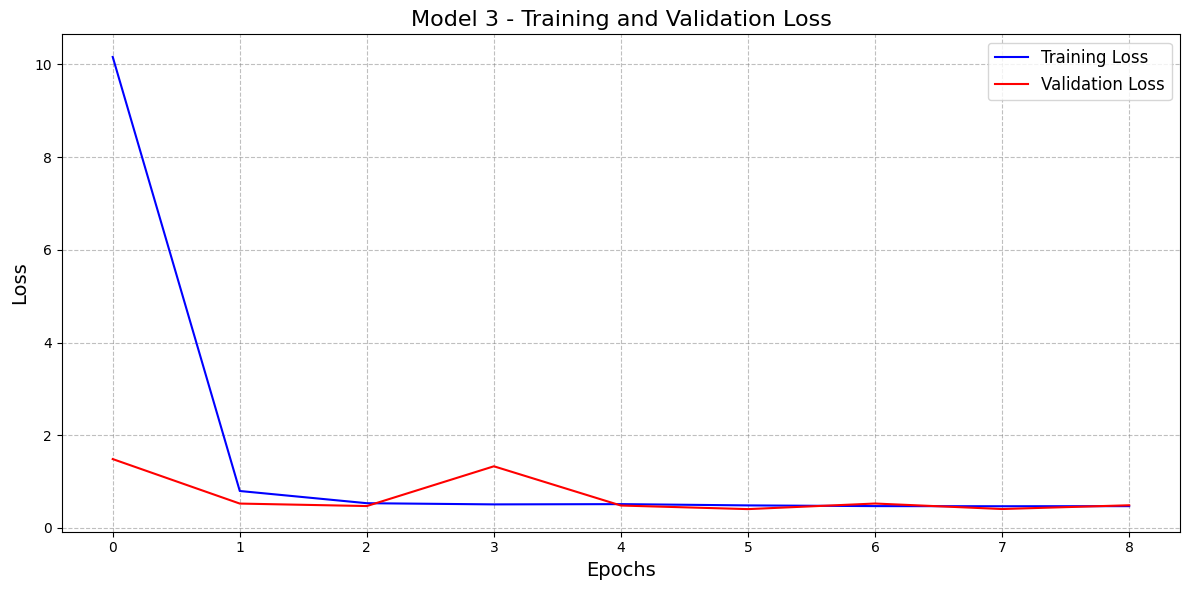

In [163]:
loss_curve_plot(history_model3, model_name="Model 3")

In [164]:
model3.save('model3.keras')

In [168]:
# Model 4
model4, history_model4 = cardio_model(
    model_type="model4",
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    optimization="rmsprop",
    early_stopping=True,
    patience=20,
    regularization_type='l2',
    reg_value=0.02,
    dropout=0.1,
    epochs=200,
    batch_size=32,
    learning_rate=0.001)

train_loss_model4, val_loss_model4 = history_model4.history['loss'][-1], history_model4.history['val_loss'][-1]
train_acc_model4, val_acc_model4 = history_model4.history['accuracy'][-1], history_model4.history['val_accuracy'][-1]

print(f"Model 4 - Train Loss: {train_loss_model4:.4f}, Validation Loss: {val_loss_model4:.4f}")
print(f"Model 4 - Train Accuracy: {train_acc_model4:.4f}, Validation Accuracy: {val_acc_model4:.4f}")

Epoch 1/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8359 - loss: 2.5377 - val_accuracy: 0.8990 - val_loss: 0.3281
Epoch 2/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9258 - loss: 0.2738 - val_accuracy: 0.9239 - val_loss: 0.2987
Epoch 3/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9373 - loss: 0.2235 - val_accuracy: 0.9466 - val_loss: 0.1930
Epoch 4/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9417 - loss: 0.2030 - val_accuracy: 0.9511 - val_loss: 0.1692
Epoch 5/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9450 - loss: 0.1956 - val_accuracy: 0.9640 - val_loss: 0.1561
Epoch 6/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9532 - loss: 0.1761 - val_accuracy: 0.9638 - val_loss: 0.1448
Epoch 7/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9531 - loss: 0.1710 - val_accuracy: 0.9694 - val_loss: 0.1191
Epoch 8/200
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9570 - l

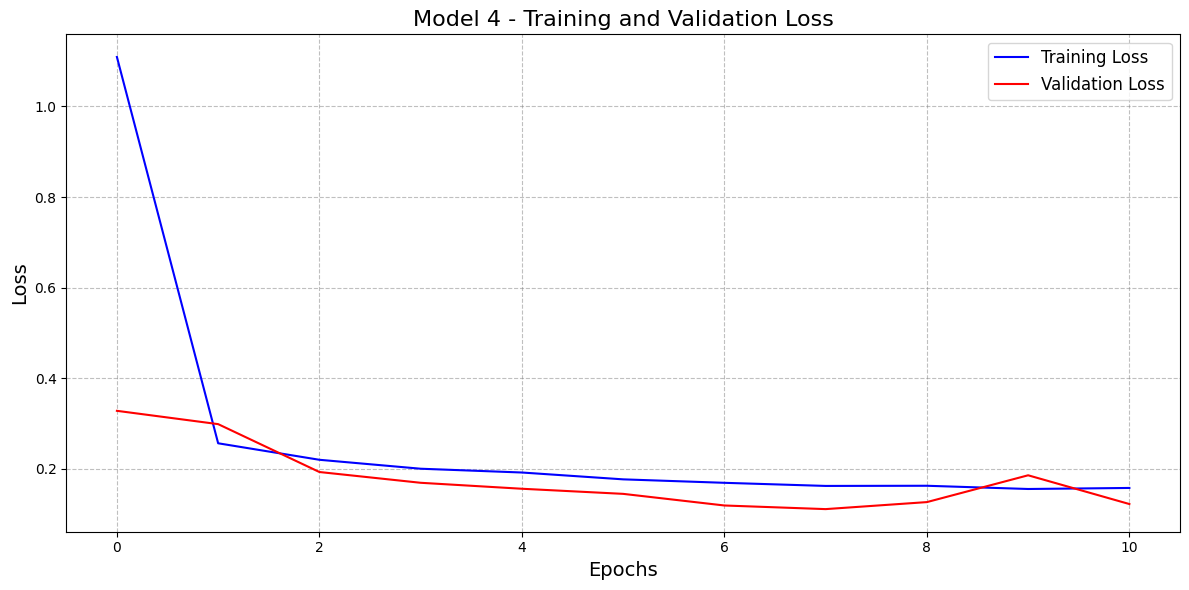

In [169]:
loss_curve_plot(history_model4, model_name="Model 4")

In [170]:
model4.save('model4.keras')

# SVM Model

In [146]:
def cardio_model_svm(X_train, Y_train, X_val, Y_val, kernel='linear', C=1.0, gamma='scale'):
    model = SVC(kernel=kernel, C=C, gamma=gamma)

    model.fit(X_train, Y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    train_acc = accuracy_score(Y_train, train_preds)
    val_acc = accuracy_score(Y_val, val_preds)

    print(f"SVM Model - Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")

    return model, train_acc, val_acc

In [147]:
model_svm = cardio_model_svm(
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    kernel='linear',
    C=1.0,
    gamma='scale'
)

SVM Model - Train Accuracy: 0.9426, Validation Accuracy: 0.9414


In [209]:
joblib.dump(model_svm, 'svm_model.pkl')

['svm_model.pkl']

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [215]:
def evaluate_model(model_path, X_test, Y_test, model_name="model"):
    if model_path.endswith(".pkl"):
        model_data = joblib.load(model_path)
        if isinstance(model_data, tuple):
            model = model_data[0]
        else:
            model = model_data

        y_pred = model.predict(X_test)
        y_pred_classes = y_pred
    else:
        model = load_model(model_path)
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)

    conf_matrix = confusion_matrix(Y_test, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print(f'{model_name} Classification Report:\n')
    print(classification_report(Y_test, y_pred_classes))

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


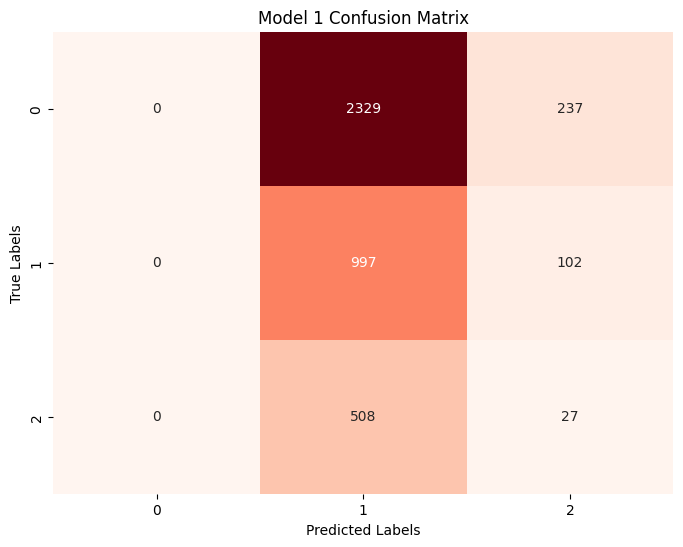

Model 1 Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2566
           1       0.26      0.91      0.40      1099
           2       0.07      0.05      0.06       535

    accuracy                           0.24      4200
   macro avg       0.11      0.32      0.15      4200
weighted avg       0.08      0.24      0.11      4200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [216]:
evaluate_model("/content/model1.keras", X_test, Y_test, "Model 1")

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


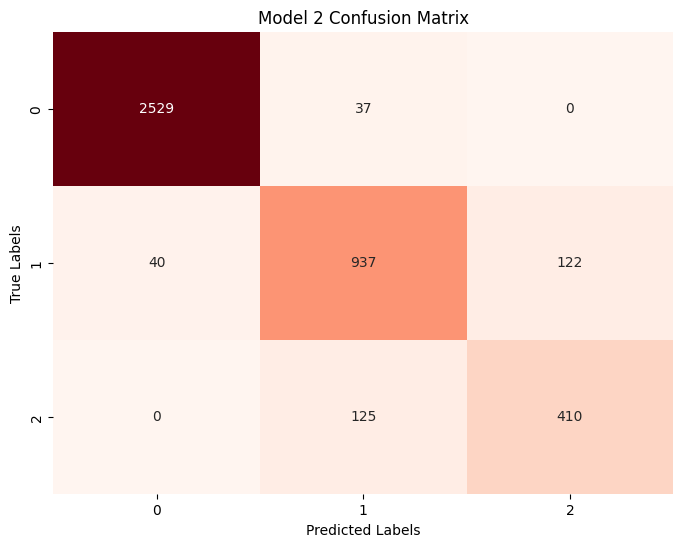

Model 2 Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2566
           1       0.85      0.85      0.85      1099
           2       0.77      0.77      0.77       535

    accuracy                           0.92      4200
   macro avg       0.87      0.87      0.87      4200
weighted avg       0.92      0.92      0.92      4200



In [217]:
evaluate_model("/content/model2.keras", X_test, Y_test, "Model 2")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


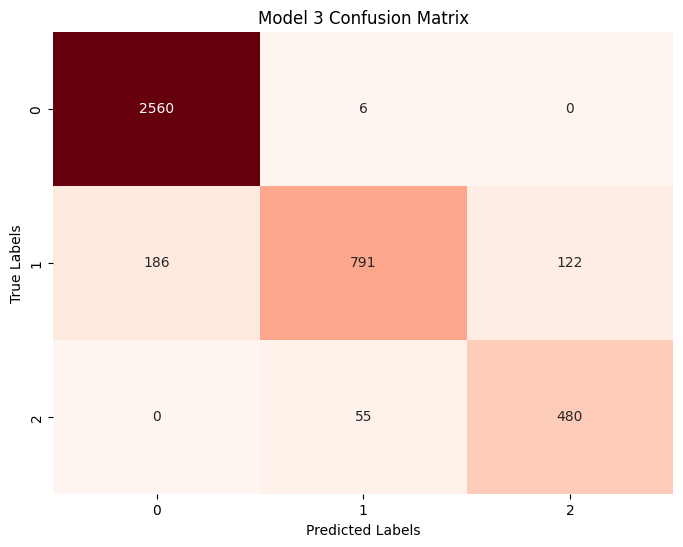

Model 3 Classification Report:

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2566
           1       0.93      0.72      0.81      1099
           2       0.80      0.90      0.84       535

    accuracy                           0.91      4200
   macro avg       0.89      0.87      0.87      4200
weighted avg       0.91      0.91      0.91      4200



In [218]:
evaluate_model("/content/model3.keras", X_test, Y_test, "Model 3")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


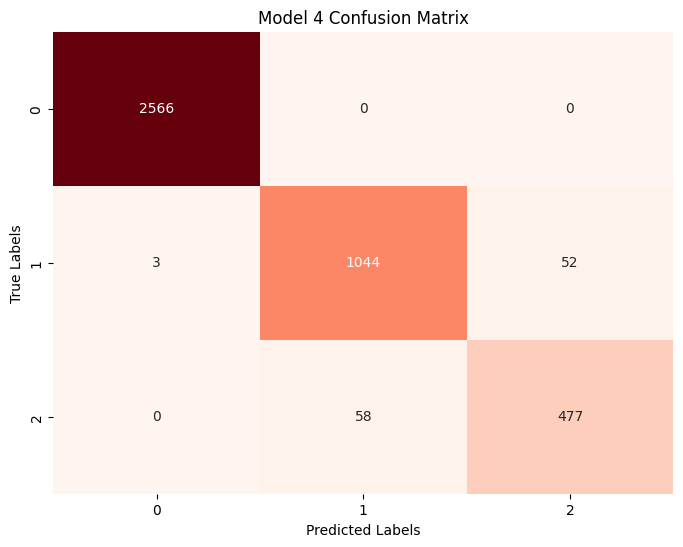

Model 4 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2566
           1       0.95      0.95      0.95      1099
           2       0.90      0.89      0.90       535

    accuracy                           0.97      4200
   macro avg       0.95      0.95      0.95      4200
weighted avg       0.97      0.97      0.97      4200



In [219]:
evaluate_model("/content/model4.keras", X_test, Y_test, "Model 4")

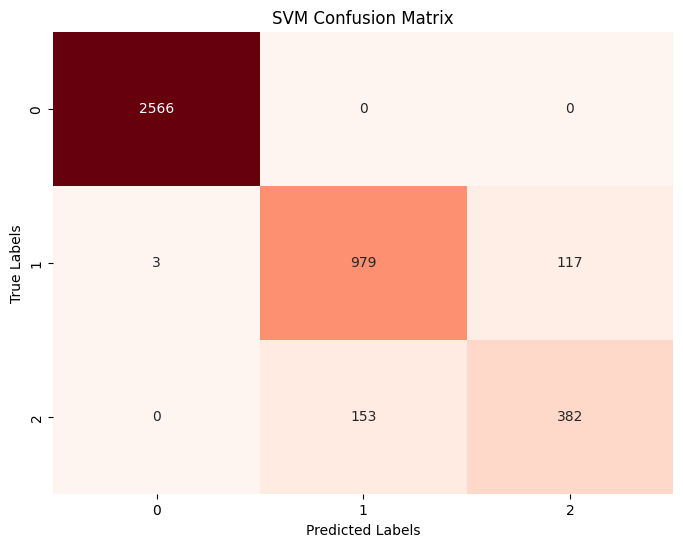

SVM Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2566
           1       0.86      0.89      0.88      1099
           2       0.77      0.71      0.74       535

    accuracy                           0.94      4200
   macro avg       0.88      0.87      0.87      4200
weighted avg       0.93      0.94      0.93      4200



In [220]:
evaluate_model('/content/svm_model.pkl', X_test, Y_test, "SVM")

In [221]:
def make_predictions(model_path, X):
    model = load_model(model_path)

    predictions = model.predict(X)

    predicted_classes = np.argmax(predictions, axis=1)

    return predicted_classes

In [222]:
model_path = '/content/model4.keras'
make_predictions(model_path, X_test)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([2, 1, 1, ..., 0, 1, 0])

Congratulations!!
